<a href="https://colab.research.google.com/github/Zhouhun/DATA_110_FALL_2025/blob/main/Data110_Tzou_Hunter_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 Assinment: Crime Data Visualization (2022-2023)

**Name:** Hunter Tzou

**Class:** Data 110 - Fall 2025

## Task 1: Basic Bar Chart for Crime Rates in 2023

In this task, you will create a **bar chart** showing the offense rates per 100,000 people for each type of crime in 2023.

### Instructions:
- Create a bar chart for crime rates in 2023.
- Customize the bar colors and add gridlines.
- Label the axes and add a title

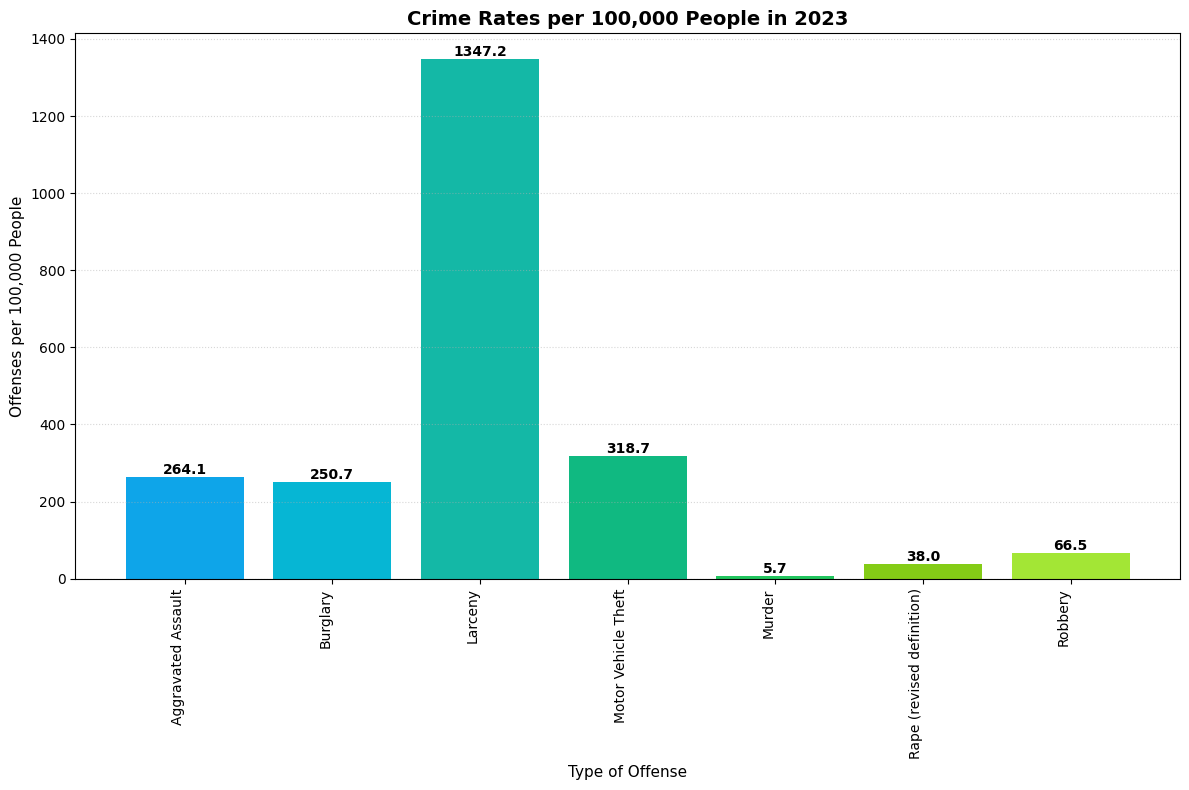

In [26]:
## Task 1: Basic Bar Chart for Crime Rates in 2023

## First I want to create a dataframe using the table provided since it was so small. I could have made it into a csv. file, but I thought this would be a good way to practice my skills with dataframes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

crime_data = {
    'Offense': [
        'Aggravated Assault',
        'Burglary',
        'Larceny',
        'Motor Vehicle Theft',
        'Murder',
        'Rape (revised definition)',
        'Robbery'
    ],
    'Offenses per 100,000 People (2023)': [264.1, 250.7, 1347.2, 318.7, 5.7, 38.0, 66.5],
    'Change in Offenses per 100,000 People (2022-2023)': [-3.3, -8.1, -4.9, 12.0, -12.0, -9.8, -0.8]
}

df = pd.DataFrame(crime_data)

plt.figure(figsize=(12, 8))

colors = ['#0EA5E9', '#06B6D4', '#14B8A6', '#10B981', '#22C55E', '#84CC16', '#A3E635'] ## I wanted to learn how to add multiple colors and assign them all at once, so I asked ChatGPT how to do that
bars = plt.bar(df['Offense'], df['Offenses per 100,000 People (2023)'], color=colors)
plt.grid(axis='y', alpha=0.5, linestyle=':')
plt.xlabel('Type of Offense', fontsize=11)
plt.ylabel('Offenses per 100,000 People', fontsize=11)
plt.title('Crime Rates per 100,000 People in 2023', fontsize=14, fontweight='bold')

## I wanted to learn how to add data values to the bars and assign them all at once, so I asked ChatGPT how to do that

# Add data labels on top of each bar
for bar in bars: ## For each iteration in bar
    height = bar.get_height() ## Get the bar height (and therefore value of the category)
    plt.text(bar.get_x() + bar.get_width()/2., ## Find the center of the bar //  bar.get_x() = left edge position // bar.get_width()/2. = half the bar width // Adding = Find center
              height, ## Put at height of bar
             f'{height:.1f}', ## Place the text at the height of the bar with 1 decimal place
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

## Task 2: Change in Crime Rates (2022 vs. 2023) with Unique Colors

In this task, you will create a **horizontal bar chart** that visualizes the **percentage change** in offense rates from 2022 to 2023 for each crime type. Each bar should have a unique color for better distinction.

### Instructions:
- Create a horizontal bar chart showing the **change in offense rates**.
- Assign a unique color to each crime type.
- Label the axes and add a title.

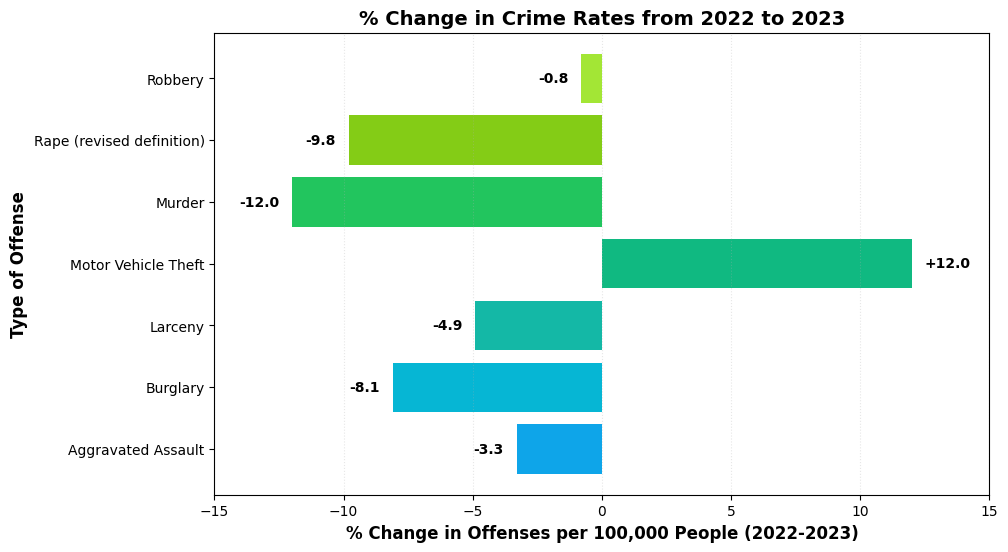

In [40]:
plt.figure(figsize=(10, 6))
colors = ['#0EA5E9', '#06B6D4', '#14B8A6', '#10B981', '#22C55E', '#84CC16', '#A3E635']
bars = plt.barh(df['Offense'], df['Change_2022_2023'], color=colors)

## I could not figure out how to make the labels appear to the right or left depending on their value, so I asked chat to help me create a For loop
for i, bar in enumerate(bars):
    width = bar.get_width()  # Get the value (change percentage)

    padding = 0.5

    # Position label to the right of positive bars, left of negative bars
    if width >= 0:
        plt.text(width + padding, bar.get_y() + bar.get_height()/2.,
                 f'+{width:.1f}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
    else:
        plt.text(width - padding, bar.get_y() + bar.get_height()/2.,
                 f'{width:.1f}',
                 ha='right', va='center', fontsize=10, fontweight='bold')

plt.xlim(-15, 15) ## The labels were really cramped and overlapping, so I decided to chance the upper and lower limits on the graph for the xaxis

plt.grid(axis='x', alpha=0.3, linestyle=':')
plt.xlabel('% Change in Offenses per 100,000 People (2022-2023)', fontsize=12, fontweight='bold')
plt.ylabel('Type of Offense', fontsize=12, fontweight='bold')
plt.title('% Change in Crime Rates from 2022 to 2023', fontsize=14, fontweight='bold')

plt.show()

### Additional Instructions:
1. **Why does this bar graph make more sense than Task 1's bar graph?**
   - I think that absolute numbers obscure the change over time which is what the FBI was trying to illustrate. Even if you had the absolute numbers of both years side by side, the audience members would still need to do the math to find out the meaningful insights. Attention is like a currency and you're spending it throughout your presentation. We need to drive our point across quickly to be able to keep their attention later on.
   
2. **Improve the clarity of your bar graph**:
   - Create **multiple versions** of the bar chart for Task 2, each time making the chart more **clear and readable**.
   - Experiment with different color schemes, labels, and gridlines.
   - In each iteration, focus on improving the ease with which someone can quickly understand the trends in crime rates.

### **More readable graph**

####*Version 1*

I think my graph is already pretty readable, but I was thinking that maybe I could increase focus by creating a gradient of green and red to show the increase or decrease of crime rate %.

I knew now how to assign colors to the categories based on their order, but I did not know how to do this based on their value. So, I asked Chat how to do this.

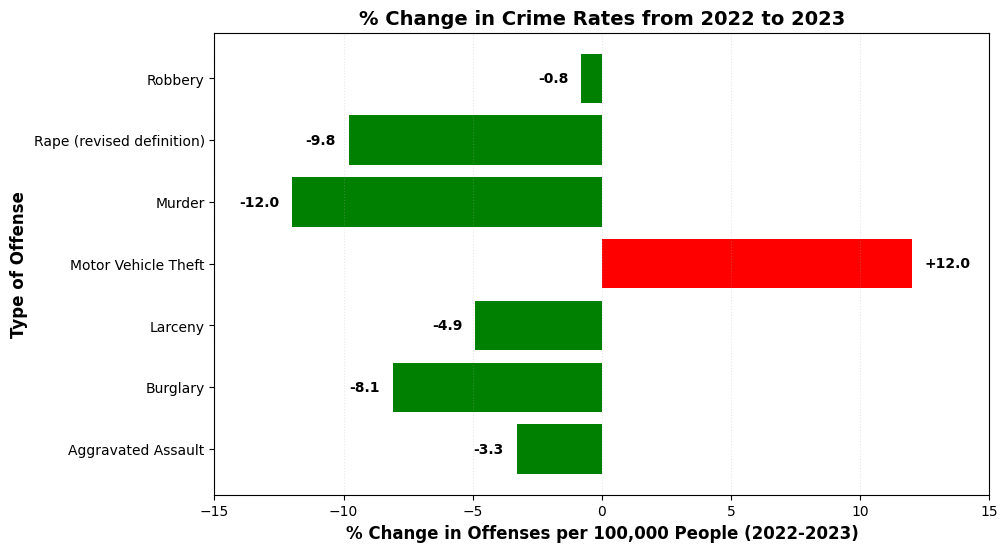

In [44]:
# Create colors based on values: negative = green, positive = red
# We'll use a list comprehension to assign colors
colors = ['green' if x < 0 else 'red' for x in df['Change_2022_2023']]

plt.figure(figsize=(10, 6))
bars = plt.barh(df['Offense'], df['Change_2022_2023'], color=colors)

## I could not figure out how to make the labels appear to the right or left depending on their value, so I asked chat to help me create a For loop
for i, bar in enumerate(bars):
    width = bar.get_width()  # Get the value (change percentage)

    padding = 0.5

    # Position label to the right of positive bars, left of negative bars
    if width >= 0:
        plt.text(width + padding, bar.get_y() + bar.get_height()/2.,
                 f'+{width:.1f}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
    else:
        plt.text(width - padding, bar.get_y() + bar.get_height()/2.,
                 f'{width:.1f}',
                 ha='right', va='center', fontsize=10, fontweight='bold')

plt.xlim(-15, 15) ## The labels were really cramped and overlapping, so I decided to chance the upper and lower limits on the graph for the xaxis

plt.grid(axis='x', alpha=0.3, linestyle=':')
plt.xlabel('% Change in Offenses per 100,000 People (2022-2023)', fontsize=12, fontweight='bold')
plt.ylabel('Type of Offense', fontsize=12, fontweight='bold')
plt.title('% Change in Crime Rates from 2022 to 2023', fontsize=14, fontweight='bold')

plt.show()

### **More readable graph**

####*Version 2*

This was good, but I think it would have been cooler to do it with a gradient since not all the categories have seen an equal amount of change, so they are not equally as important.

Once again, I had no idea how to do this, so I decided to ask Chat.

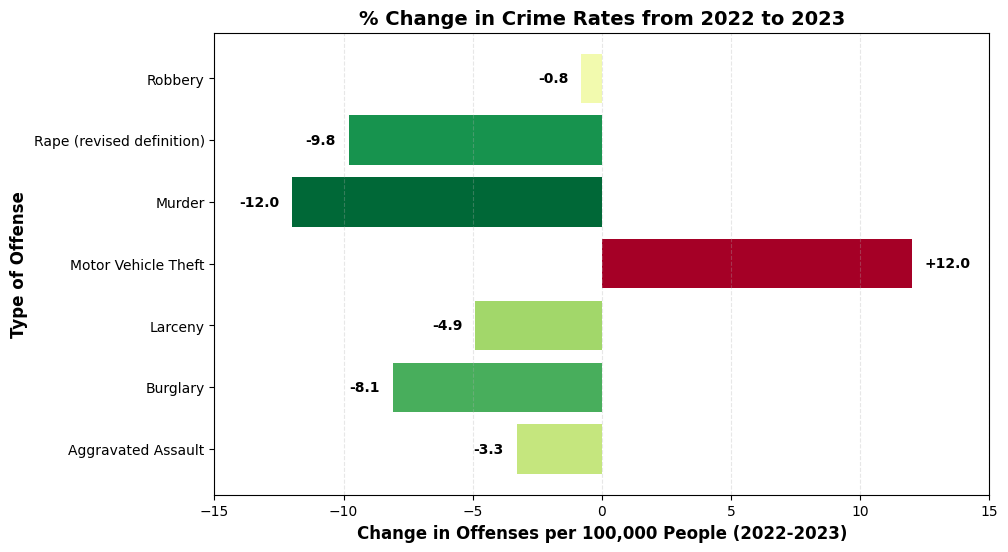

In [47]:
# Create a color gradient based on the magnitude of change
# Normalize values to range 0-1 for color mapping
norm = plt.Normalize(vmin=df['Change_2022_2023'].min(), vmax=df['Change_2022_2023'].max())
cmap = plt.cm.RdYlGn_r  # Red-Yellow-Green reversed (red for positive, green for negative)

colors = [cmap(norm(value)) for value in df['Change_2022_2023']]


plt.figure(figsize=(10, 6))
bars = plt.barh(df['Offense'], df['Change_2022_2023'], color=colors)
for i, bar in enumerate(bars):
    width = bar.get_width()  # Get the value (change percentage)
    padding = 0.5
    if width >= 0:
        plt.text(width + padding, bar.get_y() + bar.get_height()/2.,
                 f'+{width:.1f}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
    else:
        plt.text(width - padding, bar.get_y() + bar.get_height()/2.,
                 f'{width:.1f}',
                 ha='right', va='center', fontsize=10, fontweight='bold')

plt.xlim(-15, 15)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlabel('Change in Offenses per 100,000 People (2022-2023)', fontsize=12, fontweight='bold')
plt.ylabel('Type of Offense', fontsize=12, fontweight='bold')
plt.title('% Change in Crime Rates from 2022 to 2023', fontsize=14, fontweight='bold')

plt.show()

## Task 3: Multi-Series (Grouped) Bar Chart with Fake Data

In this task, you will practice making a **multi-series grouped bar chart** using a simple, fake dataset.  
Imagine three companies (**Company A, Company B, Company C**) that each sell three products (**Product 1, Product 2, Product 3**).

### Instructions:
- Create a dataset with sales values for each company’s three products.
- Plot a grouped bar chart with **3 bars per company** (Product 1, Product 2, Product 3).
- Add labels, a title, and a legend.

💡 Example structure for your dataset:
```python
companies = ["Company A", "Company B", "Company C"]
product1 = [20, 34, 30]
product2 = [25, 32, 34]
product3 = [30, 35, 27]

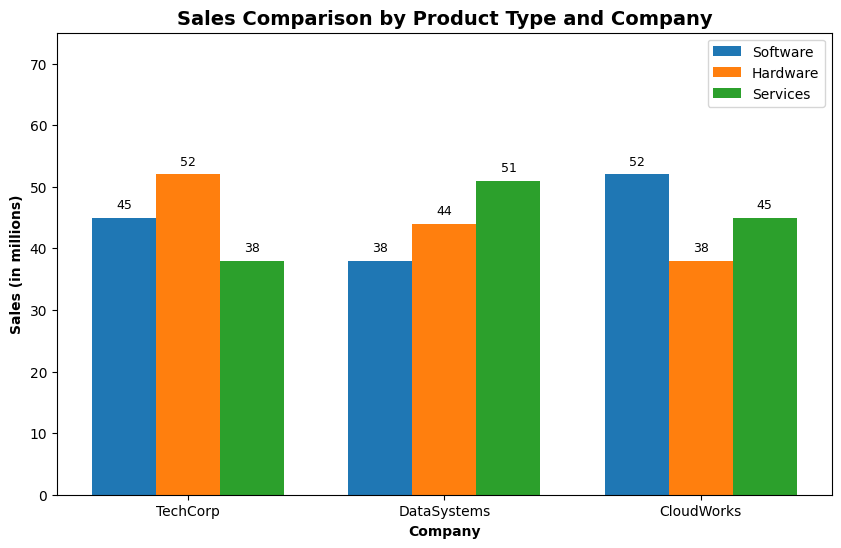

In [64]:

companies = ["TechCorp", "DataSystems", "CloudWorks"]
software_sales = [45, 38, 52]
hardware_sales = [52, 44, 38]
service_transactions = [38, 51, 45]

x = np.arange(len(companies))  # creates positions for the companies
bar_width = 0.25               # width of each bar

plt.figure(figsize=(10, 6))

software = plt.bar(x - bar_width, software_sales, width=bar_width, label="Software") ## Bar to the left
hardware = plt.bar(x, hardware_sales, width=bar_width, label="Hardware") ## Bar in center
services = plt.bar(x + bar_width, service_transactions, width=bar_width, label="Services") ## Bar to the right

for bars in [software, hardware, services]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1,
                 f'{height}', ha='center', va='bottom', fontsize=9)

plt.ylim(0, 75) ## I needed padding here because the legend was overlapping

plt.xlabel("Company",fontsize=10, fontweight='bold')
plt.ylabel("Sales (in millions)",fontsize=10, fontweight='bold')
plt.title("Sales Comparison by Product Type and Company",fontsize=14, fontweight='bold')
plt.xticks(x, companies)  # replaces x positions with company names
plt.legend()

# Display the chart
plt.show()